# Módulo gw_chem_plot
Módulo de Python para hacer algunos gráficos hidroquímicos de aguas subterráneas. En este momento los gráficos son: Schoeller, Piper y Stiff.

Las funciones que construyen los gráficos se han adaptado con ligeras modificaciones del paquete WQChartPy https://github.com/jyangfsu/WQChartPy

A continuación se explica la utiización del módulo.

In [1]:
# reload the module when it changes
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

from gw_chem_plot import GWChemPlot as gwplot

## Fichero de datos
El fichero de datos contiene los análisis de componentes mayoritarios del agua; además se necesitan otra serie de parámetros que determinan su representación en el gráfico. Estos parámetros pueden ser rellenados fácilmente con las funciones del módulo.
### Formato del fichero
Se pueden utilizar varios formatos, por ejemplo CSV o Excel xlsx; aquí se utiliza el formato __Excel xlsx__ por la facilidad en visualizar los datos. Los ficheros xlsx, aunque son un formato propietario, pueden ser creados y manipulados con programas libres, como por ejemplo LibreOffice Cal.
### Lectura del fichero de datos
Para leer el fichero de datos utilizamos la siguiente expresión:

In [4]:
fdata = './data/data_template.xlsx'

# El fichero xlsx puede tener varias hojas; el parámetro sheet_ame controla la hoja de trabajo
data = pd.read_excel(fdata, sheet_name=0)
data

,Sample,Label,Color,Marker,Size,Alpha,Ca,Mg,Na,K,HCO3,Cl,SO4
0,sample1,C1,red,o,30,0.6,32,6,28,2.8,73,43,48
1,sample2,C2,green,o,30,0.6,46,11,17,0.7,201,14,9
2,sample3,C2,green,o,30,0.6,54,11,16,2.4,207,18,10
3,sample4,C3,blue,o,30,0.6,50,11,25,2.8,244,18,9
4,sample5,C3,blue,o,30,0.6,50,22,25,0.5,305,11,9
5,sample6,C1,red,o,30,0.6,134,21,39,6.4,275,96,100


En la instrucción previa el contenido de la variable fdata debe ser rellenado de acuerdo al nombre y localizacion de fichero de datos en nuestro ordenador. El parámetro sheet_name=0 indica que los datos están en la primera hoja del fichero Excel (la segunda 1, etc.).

En el caso de que en nuestra hoja Excel tengamos configurado el decimal como coma, se añadirá el parámetro decimal=',', es decir: data = pd.read_excel(fdata, sheet_name=0, decimal=',')

### Nombres válidos de las columnas
En el fichero de datos la __primera fila__ contiene siempre un nombre que designa el __contenido de la columna__.<br>
Las columnas pueden hacer referencia a __contenidos obligatorios__ u __opcionales__.
Los contenidos obligatorios son:
1. El __código identificativo del análisis__: columna __Sample__. El código de cada análisis debe ser único.
1. El nombre de los __iones mayoritarios__: columnas __Ca, Mg, Na, K, HCO3, Cl y SO4__.
1. El nombre de los parámetros que determinan el aspecto de la __representación del análisis__ en el gráfico: columnas __Label. Color, Marker, Size. Alpha__.

1. __Código identificativo del análisis de agua__. El nombre de la columna que identifica cada análisis de agua es:

In [5]:
gwplot.analysis_name()

('Sample',)

2. Nombre de los iones a representar. __Iones obligatorios__. 

In [6]:
gwplot.required_ion_names()

('HCO3', 'Cl', 'SO4', 'Na', 'K', 'Ca', 'Mg')

2. Nombres de los iones a representar. __Iones opcionales__.<br>
Si están presentes se utilizan en los gráficos.

In [7]:
gwplot.optional_ion_names()

('CO3', 'NO3')

Otros nombres de iones o propiedades físicas del análisis se pueden escribir de cualquier modo y no van a intervenir en los gráficos: por ejemplo ph o pH; T, temperature, temp_ºC.

3. Nombres de los __parámetros que determinan la visualización__ de los análisis en los gráficos

In [8]:
gwplot.required_graph_names()

('Label', 'Color', 'Marker', 'Size', 'Alpha')

Su significado es el siguiente:
* Label. Etiqueta única para cada análisis. A nivel de representación, especialmente en el gráfico Piper, podemos indicar que varias labels tengan el mismo volor o símbolo.
* Color. Con que se representa uno a varios análisis.
* Marker. Marcador (simbolo) con que se representa uno o varios análisis (punto, rombo, círculo, etc.).
* Size. Tamaño del marcador.
* Alpha. Transparencia del marcador (cuando hay superposiciones entre marcadores, por ejemplo en un diagrama Piper).

A continuación vamos a leer otra hoja del mismo fichero Excel del ejemplo previo, ligeramente diferente a la anterior:

In [9]:
# Lectura del fichero de datos (fichero Excel) y visualización de los datos 
data = pd.read_excel(fdata, sheet_name=1)
data

,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH
0,Pozo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8
1,Pozo2,2023-02-23,46,11,17,0.7,201,0,14,9,299,7.6
2,Pozo3,2023-02-24,54,11,16,2.4,207,0,18,10,377,7.5
3,Manantial1,2023-02-23,50,11,25,2.8,244,0,18,9,360,7.7
4,Pozo5,2023-02-24,50,22,25,0.5,305,0,11,9,424,7.4
5,Pozo6,2023-02-22,134,21,39,6.4,275,0,96,100,673,7.1


Este es un ejemplo de una forma bastante común de presenar los resultados de un muestreo hidroquímico: El código del punto donde tomamos la muestra, la fecha de toma y los resultados de los análisis. A efectos de realización de los gráficos vemos que faltan las columnas 'Sample', 'Label', 'Color', 'Marker', 'Size' y 'Alpha'.

También están presentes otras columnas que no intervienen en los gráficos y que pueden ser denominadas como más nos guste; en este caso son TDS y pH.

La manera más cómoda de __revisar las columnas del fichero de datos__ es utilizar la función __check_dataframe_column_types__, que la ejecutamos en la siguiente celda:

In [10]:
gwplot.check_dataframe_column_types(data)
data

Column Sample has been automatically created
The data file does not contain the following required columns: Label,Color,Marker,Size,Alpha


,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH
0,S-1,Pozo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8
1,S-2,Pozo2,2023-02-23,46,11,17,0.7,201,0,14,9,299,7.6
2,S-3,Pozo3,2023-02-24,54,11,16,2.4,207,0,18,10,377,7.5
3,S-4,Manantial1,2023-02-23,50,11,25,2.8,244,0,18,9,360,7.7
4,S-5,Pozo5,2023-02-24,50,22,25,0.5,305,0,11,9,424,7.4
5,S-6,Pozo6,2023-02-22,134,21,39,6.4,275,0,96,100,673,7.1


Podemos observar cómo al ejecutar check_dataframe_column_types se crea automáticamente la columna Label con unos valores por defecto. El resto de columnas que faltan son columnas que indicadan cómo se van a representar los análisis en los gráficos. En este caso particular hay dos soluciones:
* Editar la hoja Excel y rellenar las columnas que faltan con los valores elegidos.
* Crear y rellenar las columnas con la ayuda de las funciones incluidas en el módulo. Esta es la opción que vamos a desarrolar a continuación.<br>

En el caso que faltasen alguna de las columnas de los aniones o cationes obligatorios (por ejemplo Cl o Ca), no habría otro remedio que añadir estas columnas en la hoja Excel. Fíjate bien que es posible que tengas estos datos en le hoja Excel pero los nombres de las columnas no estén bien escritos: por ejemplo, si el cloruro lo tienes como cl, debe cambiarse el nombre a Cl; en el caso del bicarbonato debe indicarse HCO3, no es una columna válidada CO3H o hco3. Al principio se ha indicado la lista de nombres de columna válidos.

### Rellenar desde la aplicación los parámetros de los gráficos
Cada análisis (columna Sample) tiene que ser obligatoriamente identificado con una etiqueta (Columna Label). Esta etiqueta es la que se representará en el gráfico hidroquímico. 

Los parámetros de los gráficos pueden ser rellenados manualmente por el usuario en la hoja Excel o mediante funciones en el módulo gw_chem_plot.

Sea un fichero con las columnas obligatorias mínimas salvo los parámetros de los gráficos:

In [11]:
data = pd.read_excel(fdata, sheet_name=2)
data

,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH
0,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8
1,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6
2,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5
3,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7
4,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4
5,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1


Puede observarse que existen 4 columnas no obligatorias y que por tanto podemos llamar como queramos: en este caso Toma, Fecha, TDS y pH. Las columnas __toma__ (punto de agua donde se toma la muestra) y __fecha__ nos resultan muy útiles para interpretar nuestros análisis- 

A continuación vamos a ir rellenando los parámetros de los gráficos con ayuda de las funcions de GWChemPlot.

#### Columna Sample

Como ya hemos visto, la columna Sample se general automáticamente el ejecutar la función __check_dataframe_column_types__. También se puede crear con la función __create_sample_column__, que es la que utilizamos a continuación:

In [12]:
# Esta función tiene varios parámetros, ahora utilizamos os valores por defecto
gwplot.create_column_sample(data)
data

Column Sample has been automatically created


,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1


#### Columna Label
La columna Label es la etiqueta que asignamos a cada Sample. A diferencia del código de cada análisis, que tiene que ser único, nos puede interesa que varios análisis tengan la misma etiqueta y, en este caso, tendrán la misma representación gráfica.  

Para asignar la etiqueta a los análisis utilizaremos la función __set_labels()__. Hay varias opciones:

__1.__ Rellenar las etiquetas mediante __autonumerado__ Se asigna un número correlativo a cada Sample. Para generar la etiqueta asignamos al parámetro __autonumbeing__ el valor __True__; el parámetro __first_id__ nos pertmite iniciar la numeración en el número entero positivo que queramos; el parámetro __suffix__ permite añadir un sufijo a la etiqueta.

In [14]:
# Asignar Label. Ejemplo 1
gwplot.set_labels(data, autonumbering=True, first_id=1, suffix = 'L-')
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,L-1
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,L-2
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,L-3
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,L-4
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,L-5
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,L-6


__2.__ Rellenar las etiquetas asignándolas __el valor de una o varias columnas__. La lista de columnas seleccionadas se asigna al parámetro __cols_for_labels__. Según la columna o columnas escogidas, se pueden generar valores de etiquetas únicos por análisis o no. Por ejemplo, si en un diagrama Piper hay muchos análisis para representar, puede que no nos interese diferenciar cada análisis con un color o símbolo específico; en este caso podemos representar varios análisis con la misma etiquetas y después asignar un color por etiqueta. 

* En el caso de que autonumbering sea True y cols_for_label tenga nombres de columnas, __autonumbering es predominante__. 
* Si queremos rellenar Label a partir de los cotenidos de otras columnas, si algunos de los nombres de columnas no existe, el etiquetado se realizará como si autonumbering tuviera el valor True. 

En el siguiente ejemplo todos los análisis de la misma toma (manantial pozo, sondeo, etc.) tienen la misma representación.

In [16]:
# Asignar Label. Ejemplo 2
# El siguiente criterio ocasiona que los análisis de una misma toma tengan la misma etiqueta
data = pd.read_excel(fdata, sheet_name=2)
cols_for_label = ['Toma']
gwplot.set_labels(data, autonumbering=False, suffix='', cols_for_label=cols_for_label)
data

Column Sample has been automatically created
3 labels has been assigned


,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,Sondeo1
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,Sondeo2
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,Sondeo3
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,Sondeo1
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,Sondeo2
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,Sondeo3


En siguiente ejemplo asignamos la columna label con los valores de las columnas Toma y Fecha, obteniendo de esta manera tantos valores diferentes en la columna Label como en la columna Sample.  

In [8]:
# Asignar Label. Ejemplo 3
# Este criterio crea una etiqueta por análisis 
data = pd.read_excel(fdata, sheet_name=2)
cols_for_label = ['Toma', 'Fecha',]
GWChemPlot.set_labels(data, autonumbering=False, suffix='', cols_for_label=cols_for_label)
data

Column Sample has been automatically created
6 labels has been assigned


,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,Sondeo1-2023-02-22
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,Sondeo2-2023-02-22
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,Sondeo3-2023-02-22
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,Sondeo1-2023-03-16
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,Sondeo2-2023-03-22
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,Sondeo3-2023-03-22


Es posible asignar etiquetas con criterios más complicados utilizando pandas o editando directamente el fichero de datos, pero estos casos no se consideran ahora.

#### Difereciar las etiquetas por color, marcador o ambos
En un gráfico Piper, la manera de diferenciar las diferentes etiquetas (labels) es asignarles un color o un marcador diferente a cada una. Para desarrollar este ejemplo vamos a seleccionar el criterio de asignar a la etiqueta el código de la toma, para lo que volvemos a asignar el valor de la columna Label.   

In [17]:
# data = pd.read_excel(fdata, sheet_name=2)
cols_for_label = ['Toma']
gwplot.set_labels(data, autonumbering=False, suffix='', cols_for_label=cols_for_label)
data

3 labels has been assigned


,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,Sondeo1
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,Sondeo2
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,Sondeo3
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,Sondeo1
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,Sondeo2
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,Sondeo3


#### Columna Color
En el fichero de datos se puede asignar el color de las etiquetas mediante varios métodos:
* Código hexadecimal del color.
* Mediante un nombre, que debe coincidir con un nombre válido en la librería matplotlib.

Para asignar un color a cada etiqueta, el módulo gw_chem_plot tiene la función __set_color_labels__ en la que se pueden utilizar dos métodos: 'automatic' o 'manual':




El procedimiento automático para asignar un color a cada etiqueta permite seleccionar entre asignar mediante una tabla de colores o mediante un mapa de colores.
* Una __tabla colores__ es el nombre de un listado de nombres de colores, cada uno de los tiene su representación del color. Los nombres de colores disponibles se obtienen con la función __color_names_get()__, que tiene un parámetro __table_colors__. Si además se añade el parámetro __hex_code__ con valor True devuelve también el código hexadecimal del color.
* Un __mapa de colores__ es un conjunto gradual de hasta 256 colores que se diferencian por su código de color, pero que no tienen nombres de color. ara ver los mapas de colores disponibles en matplotlib y sus colores puedes utilizar las funciones en el módulo __mpl_colors__, en el mismo directorio que gq_chm_plot.  

Los nombres disponibles de tablas de colores son:
* 'base'
* 'css4'
* 'tableau' (valor por defecto). Está formada por 10 colores que se diferencian bien con la vita.



<p style="color: blue;">* Tabla de colores TABLEAU</p>
Esta paleta presenta la ventaja que está formada por colores que se diferencian bien.

In [34]:
colors = GWChemPlot.color_names_get() 
print('Número de colores en la tabla tableau:', len(colors),'\nColores')
print(colors)

Número de colores en la tabla tableau: 10 
Colores
['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


<p style="color: blue;">* Tabla de colores BASE</p>
Es un listado de los colores básicos. Como nombre del color se indica la primera letra del color en inglés ('b' blue, 'g' green, etc.). En este caso se muestra también el código hexadecimal de cada color.

In [35]:
colors = GWChemPlot.color_names_get(color_table='base', hex_code=True) 
print('Número de colores en la tabla Base:', len(colors),'\nColores')
print(colors)

Número de colores en la tabla Base: 8 
Colores
[('b', '#0000ff'), ('g', '#008000'), ('r', '#ff0000'), ('c', '#00bfbf'), ('m', '#bf00bf'), ('y', '#bfbf00'), ('k', '#000000'), ('w', '#ffffff')]


<p style="color: blue;">*Tabla de colores CSS4</p>
Esta paleta es mucho más amplia, pero hay varios colores muy tenues y colores próximos que son prácticamente imposibles de diferenciar.

In [36]:
colors = GWChemPlot.color_names_get(color_table='css4') 
print('Número de colores de css4:', len(colors),'\nColores')
print(colors)

Número de colores de css4: 148 
Colores
['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'ligh

<p style="color: blue;">*Mapas de colores</p>
Para ver los mapas de colores disponibles en matplotlib se puede explorar el contenido del módulo mpl_colors.

<p style="color: blue;">Asignar un color a las etiquetas (label)</p>

Se utiliza la función __color_set()__. Esta función tiene varios parámetros que permiten un control de los colores adoptados y que pueden ser consultados en la documentación de la función en el módulo. En la mayor parte de los casos podemos trabajar con sus valores por defecto, lo que nos simplifica la asignación de los colores a las etiquetas. En su comportamiento por defecto, para un número de etiquetas no superior a 10 se asignan los colores de la lista 'tableau' y si exceden a 10 se utilizan el mapa de color 'brg' (transición de 256 colores entre los colores base azul-rojo-verde). Para más de 250 etiquetas los colores se repiten, pero con muchos menos colores ya son indiferenciales a la vista.  

El número de etiquetas presentes que se desea diferenciar mediante colores se puede obtener mediante la expresión __len(get_labels())__, como se hace a continuación: 

In [37]:
len(GWChemPlot.get_labels(data))

3

Como tenemos solo 3 etiquetas podemos escoger cualquier tabla de colores y asignar un color diferente a cada etiqueta. En el ejemplo a continuación seleccionamos la tabla de colores por defecto, que es la tableau (al ser la opción por defecto no es necesario especificarla).

In [38]:
# Asignar color a las etiquetas. Ejemplo 1
GWChemPlot.color_labels_set(data)
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,Sondeo1,tab:blue
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,Sondeo2,tab:orange
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,Sondeo3,tab:green
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,Sondeo1,tab:blue
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,Sondeo2,tab:orange
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,Sondeo3,tab:green


In [39]:
# Asignar color a las etiquetas. Ejemplo 2. Utilizamos la tabla de colores 'base'
GWChemPlot.color_labels_set(data, color_table='base')
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,Sondeo1,b
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,Sondeo2,g
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,Sondeo3,r
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,Sondeo1,b
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,Sondeo2,g
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,Sondeo3,r


Obsérvese que identificacion de los colores coincide con la primera letra de su nombre en inglés. 

In [40]:
# Asignar color a las etiquetas. Ejemplo 3. Mediante el mapa de colores 'brg'
GWChemPlot.color_labels_set(data, method='colormap')
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color
0,S-1,Sondeo1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,Sondeo1,#0000ffff
1,S-2,Sondeo2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,Sondeo2,#fe0100ff
2,S-3,Sondeo3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,Sondeo3,#00ff00ff
3,S-4,Sondeo1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,Sondeo1,#0000ffff
4,S-5,Sondeo2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,Sondeo2,#fe0100ff
5,S-6,Sondeo3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,Sondeo3,#00ff00ff


Cuando la asignación de colores se hace utilizando el método colormap el color se asigna en su representación hexagecimal. No hay una correspondencia directa entre esta representación y un nombre de color.

Como a se ha indicado, para ver los colores de uno de los colormap de matplotlib se puede utilizar el módulo __mpl_colors__, en el mismo directorio que el módulo gw_chem_plot. 

#### Columna Marker
La columna Marker permita asignar un marcador a los análisis. Hay dos opciones.
* Asignar el mismo márcador a todas las etiquetas (columna Label).
* Asignar un márcador a cada Label. 

Lo primer vamos a comprobar si hay etiquetas con el mismo color:

In [26]:
data.groupby('Color')['Label'].nunique().reset_index(name='Número de labels')

,Color,Número de labels
0,#0000ffff,1
1,#00ff00ff,1
2,#fe0100ff,1


Todas los colores están asociados a una sola etiqueta (Label); esto significa que no tenemos necesidad de poner marcadores (columna Marker) diferentes a cada par Label, Color.

Los marcadores no tienen nombres intuitivos. Lo primero valos a ver que marcadores tenemos disponibles.

In [23]:
print(GWChemPlot.get_filled_markers())

['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']


Vamos a ver la correspondencia entre la letra y el símbolo

['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']


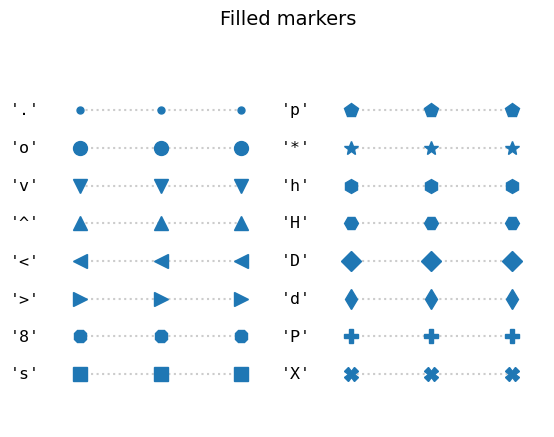

In [24]:
print(GWChemPlot.get_filled_markers(True))

A continuación varios ejemplos de asignación de marcador

In [25]:
# Ejemplo 1. Marcador único
GWChemPlot.set_markers(data, single_marker=True)
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color,Marker
0,sample1,1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,2023-02-22,tab:red,.
1,sample2,2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,2023-02-22,tab:red,.
2,sample3,3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,2023-02-22,tab:red,.
3,sample4,1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,2023-03-16,tab:blue,.
4,sample5,2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,2023-03-22,#9e0000,.
5,sample6,3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,2023-03-22,#9e0000,.


In [27]:
# Ejemplo 2. Marcador único pero elejimos nosotros el marcador
GWChemPlot.set_markers(data, single_marker=True, my_markers= ['o'])
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color,Marker
0,sample1,1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,2023-02-22,tab:red,o
1,sample2,2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,2023-02-22,tab:red,o
2,sample3,3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,2023-02-22,tab:red,o
3,sample4,1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,2023-03-16,tab:blue,o
4,sample5,2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,2023-03-22,#9e0000,o
5,sample6,3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,2023-03-22,#9e0000,o


In [28]:
# Ejemplo 3. Marcador diferente para cada pareja etiqueta, color
GWChemPlot.set_markers(data, single_marker=False)
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color,Marker
0,sample1,1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,2023-02-22,tab:red,.
1,sample2,2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,2023-02-22,tab:red,.
2,sample3,3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,2023-02-22,tab:red,.
3,sample4,1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,2023-03-16,tab:blue,o
4,sample5,2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,2023-03-22,#9e0000,v
5,sample6,3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,2023-03-22,#9e0000,v


In [30]:
# Ejemplo 4. Seleccionamos los marcadores
mis_marcadores = ['o', '*', 'P']
GWChemPlot.set_markers(data, single_marker=False, my_markers=mis_marcadores)
data

,Sample,Toma,Fecha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,pH,Label,Color,Marker
0,sample1,1,2023-02-22,32,6,28,2.8,73,0,43,48,233,7.8,2023-02-22,tab:red,o
1,sample2,2,2023-02-22,46,11,17,0.7,201,0,14,9,299,7.6,2023-02-22,tab:red,o
2,sample3,3,2023-02-22,54,11,16,2.4,207,0,18,10,377,7.5,2023-02-22,tab:red,o
3,sample4,1,2023-03-16,50,11,25,2.8,244,0,18,9,360,7.7,2023-03-16,tab:blue,*
4,sample5,2,2023-03-22,50,22,25,0.5,305,0,11,9,424,7.4,2023-03-22,#9e0000,P
5,sample6,3,2023-03-22,134,21,39,6.4,275,0,96,100,673,7.1,2023-03-22,#9e0000,P


### Lectura del fichero de datos en el que faltan columnas obligatorias 

Si faltan iones obligatorios



1. Las columnas 'Punto de muestreo' y 'Fecha de muestreo' son alfanuméricas opcionales; uniendo los contenidos de las dos columnas se obtiene la columna obligatoria 'Sample'. Es una manipulación externa que se puede hacer fácilmente en Excel, Calc o similar.
1. Las columnas pH y TDS (TSD) son opcionales; no intervienen en los gráficos
1. La columna de la izquierda (sin nombre) representa el número de análisis (fila de datos) según el orden en el fichero de datos y es asignado automáticamente
La fila 7 tiene varias celdas sin dato (en blanco en el fichero original); la ausencia de valor es sustituida atomáticamente por la representación NaN (Not a Number).

Cuando el número de filas (análisis de agua) es alto, es más fácil inspeccionar los tipos de las columnas y las celdas sin valor con instrucción data.info(). Como ya se ha visto anteriormente, la instrucción tiene 2 partes: a la izquierda del punto se escribe el nombre de la variable en que se han almacenado los datos ('data' en este caso); a continuación el nombre de la función que realiza la tarea deseada 'info()'<br>
1. Para cada columna nos indica el número de valores no nulos y nulos
2. A continuación nos dice el tipo: Hay dos clases de tipos (deducidos por el contenido de la columna):
    1. object. Valores alfanuméricos.
    2. float64. Valores numéricos.
3. Los iones requeridos son: Cl, SO4, HCO3, Na, K, Ca y Mg. Si algún análisis no tiene (NaN) un valor de estos iones no será considerado.
4. Si la columna de algunos de iones requeridos es de tipo 'object', quiere decir que tenemos alguna celda con un contenido que ha leido como texto y entonces la columna entera es leida como tipo 'object'. No hay otro remedio que abandonar el proceso y arreglar el fichero de datos antes de reiniciar el proceso por el principio.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Punto muestreo  10 non-null     object 
 1   Fecha muestreo  10 non-null     object 
 2   Sample          10 non-null     object 
 3   Label           10 non-null     object 
 4   Color           10 non-null     object 
 5   Marker          9 non-null      object 
 6   Size            9 non-null      float64
 7   Alpha           9 non-null      float64
 8   pH              9 non-null      float64
 9   Ca              9 non-null      float64
 10  Mg              9 non-null      float64
 11  Na              9 non-null      float64
 12  K               8 non-null      float64
 13  HCO3            9 non-null      float64
 14  CO3             9 non-null      float64
 15  Cl              9 non-null      float64
 16  SO4             9 non-null      float64
 17  TDS             9 non-null      float6

## Filtrar los datos de los análisis
Para entrar en el proceso de crear los gráficos hidroquímicos los primero que hay que hacer es crear una variable de tipo GWChemPlot con los datos 'data'; en este caso el nombre de la variable es 'gwp', pero podría ser cualquier otro. A continuación se muestran los datos que han sido aceptados.

In [3]:
gwp = GWChemPlot(data)
gwp.data

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,sample1,C1,red,o,30,0.6,7.8,32,6,28,2.8,73,0,43,48,233
1,sample2,C2,green,o,30,0.6,7.6,46,11,17,0.7,201,0,14,9,299
2,sample3,C2,green,o,30,0.6,7.5,54,11,16,2.4,207,0,18,10,377
3,sample4,C3,blue,o,30,0.6,7.7,50,11,25,2.8,244,0,18,9,360
4,sample5,C3,blue,o,30,0.6,7.4,50,22,25,0.5,305,0,11,9,424
5,sample6,C1,red,o,30,0.6,7.1,134,21,39,6.4,275,0,96,100,673


Nótese que no se han cargado los análisis del punto de muestreo PM4 por no cumplir los requisitos que se han comentantado previamente.<br>
### Errores de balance iónico (columna cbe, charge balance error) 
Una vez inspeccionados los datos filtrados, se procede a continuación a realizar el balance iónico y ver el error.<br>
El resultado del error del balance iónico se ejecuta en la instrucción 'gwp.cbe()'; el resultado se guarda en la variable 'er_cbe' y a continuación se muestran los resultados obtenidos


In [6]:
er_cb = gwp.cbe()
er_cb

,Sample,HCO3,CO3,Cl,SO4,Ca,Mg,Na,K,cbe
0,sample1,1.196392,0.0,1.212873,0.999348,1.596886,0.493726,1.217933,0.071614,-0.419140
1,sample2,3.294175,0.0,0.394889,0.187378,2.295524,0.905164,0.739459,0.017904,1.041659
2,sample3,3.392508,0.0,0.507714,0.208198,2.694745,0.905164,0.695962,0.061384,2.939329
3,sample4,3.998899,0.0,0.507714,0.187378,2.495134,0.905164,1.087440,0.071614,-1.455023
4,sample5,4.998623,0.0,0.310270,0.187378,2.495134,1.810327,1.087440,0.012788,-0.830869
5,sample6,4.506955,0.0,2.707810,2.081976,6.686960,1.728039,1.696407,0.163690,4.998790


### Opcional. Grabar los errores de balance iónico en un fichero
El resultado obtenido se puede grabar en un fichero.<br>
A continuación se incluye la instrucción opcional de grabar el resultado en una hoja Excel

In [13]:
fo = './data/cbe_data_template.xlsx'
er_cb.to_excel(fo)

Al inspeccionar 'er_cb' se observa que hay 2 análisis que tienen un valor absoluto de cbe > 10. Para filtrar se indica que se van a utilizar los análisis con un valor de cbe > -10 o < 10. A continuación se crea un filtro y se almacena en la variable 'mask', cuyo contenido se muestra a continuación:

In [14]:
mask = (np.abs(er_cb['cbe']) <= 10)
mask

0     True
1     True
2     True
3     True
4     True
5     True
8    False
9    False
Name: cbe, dtype: bool

Se puede observar que los análisis que no se quieren considerar (las filas 8 y 9) aparecen con un valor False.

Si se quiere utilizar un límite diferente para los valores negativos y positivos de cbe, el filtro también se puede escribir de la siguiente manera:

In [11]:
mask = (er_cb['cbe'] >= -10) & (er_cb['cbe'] <= 10)
mask

0     True
1     True
2     True
3     True
4     True
5     True
8    False
9    False
Name: cbe, dtype: bool

A continuación se aplica el filtro a los datos almacenados en el objeto 'gwp'

In [12]:
gwp.data[mask]

,Punto muestreo,Fecha muestreo,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,PM1,15/01/2023,PM1-15/01/2023,C1,red,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,73.0,0.0,43.0,48.0,233.0
1,PM1,26/01/2023,PM1-26/01/2023,C1,red,o,30.0,0.6,7.1,134.0,21.0,39.0,6.4,275.0,0.0,96.0,100.0,673.0
2,PM2,15/01/2023,PM2-15/01/2023,C2,green,o,30.0,0.6,7.6,46.0,11.0,17.0,0.7,201.0,0.0,14.0,9.0,299.0
3,PM2,26/01/2023,PM2-26/01/2023,C2,green,o,30.0,0.6,7.5,54.0,11.0,16.0,2.4,207.0,0.0,18.0,10.0,377.0
4,PM3,15/01/2023,PM3-15/01/2023,C3,blue,o,30.0,0.6,7.7,50.0,11.0,25.0,2.8,244.0,0.0,18.0,9.0,360.0
5,PM3,26/01/2023,PM3-26/01/2023,C3,blue,o,30.0,0.6,7.4,50.0,22.0,25.0,0.5,305.0,0.0,11.0,9.0,424.0


Se puede observar que han desaparecido los análisis de punto de muestreo PM5 (filas 8 y 9 de la variable 'mask' con valor False).

A continuación se actualizan los datos en 'gwp'; de esta manera nos ahorramos utilizar la máscara 'mask' cada vez que queremos hacer algo con los datos filtrados.

In [15]:
gwp.data = gwp.data[mask]
gwp.data

,Punto muestreo,Fecha muestreo,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,PM1,15/01/2023,PM1-15/01/2023,C1,red,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,73.0,0.0,43.0,48.0,233.0
1,PM1,26/01/2023,PM1-26/01/2023,C1,red,o,30.0,0.6,7.1,134.0,21.0,39.0,6.4,275.0,0.0,96.0,100.0,673.0
2,PM2,15/01/2023,PM2-15/01/2023,C2,green,o,30.0,0.6,7.6,46.0,11.0,17.0,0.7,201.0,0.0,14.0,9.0,299.0
3,PM2,26/01/2023,PM2-26/01/2023,C2,green,o,30.0,0.6,7.5,54.0,11.0,16.0,2.4,207.0,0.0,18.0,10.0,377.0
4,PM3,15/01/2023,PM3-15/01/2023,C3,blue,o,30.0,0.6,7.7,50.0,11.0,25.0,2.8,244.0,0.0,18.0,9.0,360.0
5,PM3,26/01/2023,PM3-26/01/2023,C3,blue,o,30.0,0.6,7.4,50.0,22.0,25.0,0.5,305.0,0.0,11.0,9.0,424.0


## Diagrama Piper
Primero se almacena en una variable nueva, por ejemplo 'fig_Piper' el directorio y el nombre de la imagen en formato png con el diagrama de Piper. La imagen también se muestra en pantalla

InvalidIndexError: (slice(None, None, None), 2)

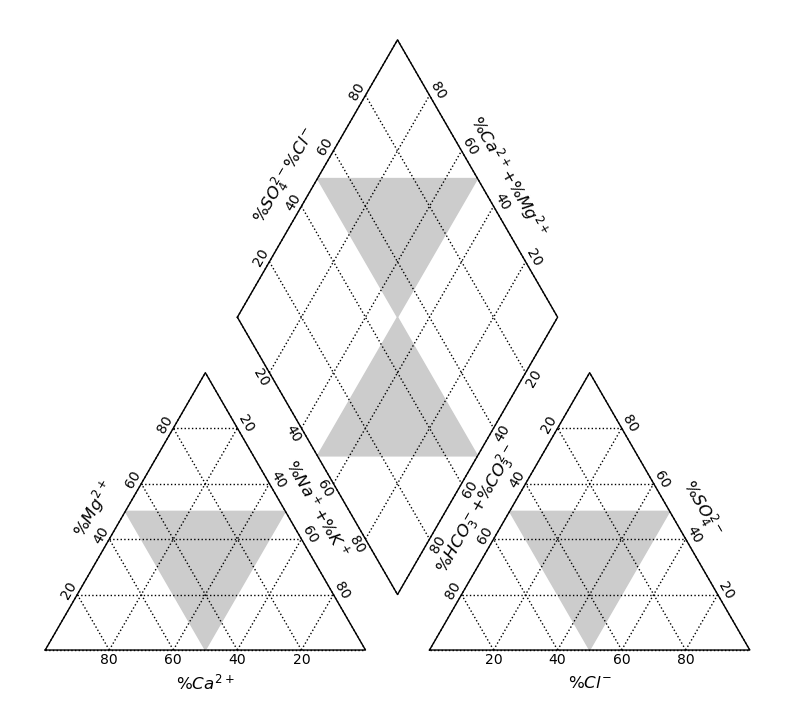

In [4]:
fig_Piper = './out/piper2_data_template.png'
gwp.plot_Piper2(fig_Piper)

También se puede mostrar una tabla con la clasificación de iones mayoritarios. En la tabla se muestra el tanto por uno en meq/L de cada ion y el tipo correspondiente que resulta.

In [17]:
ids = gwp.ion_dominant_classification()
ids

,Sample,HCO3_CO3,Cl,SO4,Na_K,Ca,Mg,cations_classified,anions_classified
0,PM1-15/01/2023,0.350991,0.355826,0.293183,0.381505,0.472429,0.146066,Mixta (cálcico-sódico-magnésica),Mixta (clorurada-bicarbonatada-sulfatada)
1,PM1-26/01/2023,0.484789,0.291264,0.223947,0.181030,0.650793,0.168177,Cálcica (sódico-magnésica),Mixta (bicarbonatada-clorurada-sulfatada)
2,PM2-15/01/2023,0.849793,0.101869,0.048338,0.191347,0.579963,0.228689,Cálcica (magnésico-sódica),Bicarbonatada (clorurada-sulfatada)
3,PM2-26/01/2023,0.825745,0.123579,0.050676,0.173813,0.618450,0.207737,Cálcica (magnésico-sódica),Bicarbonatada (clorurada-sulfatada)
4,PM3-15/01/2023,0.851919,0.108163,0.039919,0.254215,0.547256,0.198529,Cálcica (sódico-magnésica),Bicarbonatada (clorurada-sulfatada)
5,PM3-26/01/2023,0.909457,0.056451,0.034092,0.203532,0.461576,0.334893,Mixta (cálcico-magnésico-sódica),Bicarbonatada (clorurada-sulfatada)


La tabla se puede guardar en varios formato, por ejemplo Excel. En la variable 'fo' se escribe la ruta y nombre del fichero de salida. A continuación se ejecuta el método 'to_excel'. En este caso se ha seleccionado no grabar el número entero de la izquierda que indica el número de fila (index=False) y que los números tengan un máximo de 3 decimales (float_format='%.3f')

In [18]:
fo = './out/facies_data_template.xlsx'
ids.to_excel(fo, index=False, float_format='%.3f')

## Diagrama Schoeller
Al igual que en el caso del diagrama de Piper, primero se almacena en una variable nueva, por ejemplo 'fig_Schoeller' el directorio y el nombre de la imagen en formato png que va a contener este tipo de gráfico. La imagen también se muestra en pantalla.

Schoeller plot saved


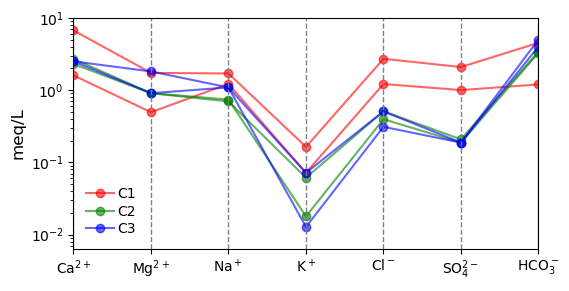

In [19]:
fig_Schoeller = './out/schoeller_data_template.png'
gwp.plot_Shoeller(fig_Schoeller)

## Diagramas Stiff
En este caso se crea una figura para cada análisis. También en este caso se crea una variable con un nombre para __una__ figura, por ejemplo 'fig_Stiff', pero a partir del nombre dado, en este caso 'stiff_data_template.png', se crean automáticamente un nuevo nombre para cada análisis insertando la etiqueta Sample antes del punto de la extensión. Si la etiqueta Sample contiene el caracter '/' es reemplazado por '-'. 

Otra particularidad es que estas figuras, una por cada etiqueta Sample, no se muestran en la pantalla. Se debe ir al directorio correspondiente y abrir cada una de los ficheros png creados para ver imágenes.  

In [20]:
fig_Stiff = './out/stiff_data_template.png'
gwp.plot_Stiff(fig_Stiff)

Stiff diagram stiff_data_template_PM1-15-01-2023.png saved
Stiff diagram stiff_data_template_PM1-26-01-2023.png saved
Stiff diagram stiff_data_template_PM2-15-01-2023.png saved
Stiff diagram stiff_data_template_PM2-26-01-2023.png saved
Stiff diagram stiff_data_template_PM3-15-01-2023.png saved
Stiff diagram stiff_data_template_PM3-26-01-2023.png saved
Stiff plots saved
